# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Regression using only Climate Score and Lane 

In [2]:
df = pd.read_csv("../Clean Data/regression_dataset.csv")
df.head()

,Unnamed: 0,Latitude,Longitude,Lane Count,Month,ClimateType,Estimated Monthly Consumption (kWh)
0,0,24.727131,120.951897,3.0,5,-0.737638,1738.5
1,1,24.727131,120.951897,3.0,6,-0.429355,1738.5
2,2,24.727131,120.951897,3.0,7,-0.313095,1908.0
3,3,24.727131,120.951897,3.0,8,0.086170,1908.0
4,4,24.727131,120.951897,3.0,9,-0.371253,1796.0


In [23]:
# Load your data
df = pd.read_csv("../Clean Data/regression_dataset.csv")

# Select features and target
X = df[["Latitude", "Longitude", "Lane Count", "Month"]]
y = df["Estimated Monthly Consumption (kWh)"]

# Split data (simple random split; replace with group-wise split if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} kWh")
print(f"R² Score: {r2:.2f}")

MAE: 59.26 kWh
R² Score: 0.93


# Accuracy Visualization

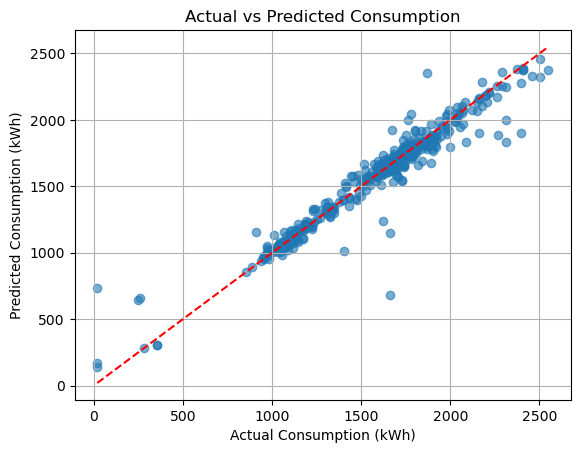

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Consumption (kWh)")
plt.ylabel("Predicted Consumption (kWh)")
plt.title("Actual vs Predicted Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [25]:
importances = model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")


Latitude: 0.371
Longitude: 0.331
Lane Count: 0.233
Month: 0.065


# Export

In [26]:
import joblib
joblib.dump(model, "Exports/Consumption Model/random_forest_consumption_model_location_lane_month.pkl")

['Exports/Consumption Model/random_forest_consumption_model_location_lane_month.pkl']

# Load & Test

In [27]:
import joblib
import numpy as np

# 24.727131,120.951897,3.0,5,-1,1738.5

# Load the saved model
model = joblib.load("Exports/Consumption Model/random_forest_consumption_model_location_lane_month.pkl")

# Input: [Latitude, Longitude, Lane Count, Month]
sample_input = np.array([[24.727131, 120.951897, 3.0, 5]])

# Predict
predicted_consumption = model.predict(sample_input)
print(f"Predicted Monthly Consumption: {predicted_consumption[0]:.2f} kWh")


Predicted Monthly Consumption: 1715.66 kWh


d:\Anaconda\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
